#### Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.ensemble import RandomForestClassifier
# !pip install pycaret
from pycaret.regression import *

#### Importing the data

In [2]:
data=pd.read_csv("data/q1-2019.csv")
data.head()

,Unnamed: 0,sellerName,origChannel,origIntRate,origUPB,origDate,firstPmtDate,origLTV,origCLTV,numBorrowers,...,AvgCreditScore,loanPurp,propState,zipCode,pMIperct,mortInsType,fmacRate,fredRate,rateDiff,rateDiffPct
0,0,"UNITED SHORE FINANCIAL SERVICES, LLC DBA UNITE...",1,4.625,160000,2019-02-01,4/1/2019,80,80,2,...,755.0,C,IN,462,0,0,4.46,2.7,0.165,0.036996
1,1,"UNITED SHORE FINANCIAL SERVICES, LLC DBA UNITE...",1,4.500,510000,2019-02-01,4/1/2019,64,64,2,...,769.5,C,CA,913,0,0,4.46,2.7,0.040,0.008969
2,2,QUICKEN LOANS INC.,0,4.750,143000,2019-02-01,4/1/2019,68,68,1,...,674.0,C,NC,286,0,0,4.46,2.7,0.290,0.065022
3,3,"UNITED SHORE FINANCIAL SERVICES, LLC DBA UNITE...",1,4.500,160000,2019-02-01,4/1/2019,17,17,1,...,738.0,C,CA,920,0,0,4.46,2.7,0.040,0.008969
4,4,PENNYMAC CORP.,2,4.500,320000,2019-02-01,4/1/2019,74,74,2,...,729.0,R,LA,707,0,0,4.46,2.7,0.040,0.008969


In [3]:
data.rename(columns={'Unnamed: 0':'namedCol'}, inplace=True )

In [4]:
data.shape

(28939, 24)

In [5]:
#Checking for missing values
data.isnull().sum()

namedCol            0
sellerName          0
origChannel         0
origIntRate         0
origUPB             0
origDate            0
firstPmtDate        0
origLTV             0
origCLTV            0
numBorrowers        0
origDebtIncRatio    0
borrCreditScore     0
BestCreditScore     0
WorstCreditScore    0
AvgCreditScore      0
loanPurp            0
propState           0
zipCode             0
pMIperct            0
mortInsType         0
fmacRate            0
fredRate            0
rateDiff            0
rateDiffPct         0
dtype: int64

In [6]:
#Checking datatypes of individual feature
data.dtypes

namedCol              int64
sellerName           object
origChannel           int64
origIntRate         float64
origUPB               int64
origDate             object
firstPmtDate         object
origLTV               int64
origCLTV              int64
numBorrowers          int64
origDebtIncRatio      int64
borrCreditScore       int64
BestCreditScore       int64
WorstCreditScore      int64
AvgCreditScore      float64
loanPurp             object
propState            object
zipCode               int64
pMIperct              int64
mortInsType           int64
fmacRate            float64
fredRate            float64
rateDiff            float64
rateDiffPct         float64
dtype: object

In [7]:
#Dropping features  not required in model building and prediction
data.drop(['namedCol', 'sellerName', 'origChannel', 'firstPmtDate', 'numBorrowers', 'borrCreditScore', 'BestCreditScore',
           'AvgCreditScore', 'loanPurp', 'pMIperct', 'mortInsType', 'rateDiffPct'],1, inplace=True)

In [8]:
data.head()

,origIntRate,origUPB,origDate,origLTV,origCLTV,origDebtIncRatio,WorstCreditScore,propState,zipCode,fmacRate,fredRate,rateDiff
0,4.625,160000,2019-02-01,80,80,34,752,IN,462,4.46,2.7,0.165
1,4.500,510000,2019-02-01,64,64,40,767,CA,913,4.46,2.7,0.040
2,4.750,143000,2019-02-01,68,68,16,674,NC,286,4.46,2.7,0.290
3,4.500,160000,2019-02-01,17,17,43,738,CA,920,4.46,2.7,0.040
4,4.500,320000,2019-02-01,74,74,26,697,LA,707,4.46,2.7,0.040


In [9]:
data['propState'] = data['propState'].astype('category')
data['stateCat'] = data['propState'].cat.codes

In [10]:
data.drop(['propState'], 1, inplace=True)

In [11]:
data.head()

,origIntRate,origUPB,origDate,origLTV,origCLTV,origDebtIncRatio,WorstCreditScore,zipCode,fmacRate,fredRate,rateDiff,stateCat
0,4.625,160000,2019-02-01,80,80,34,752,462,4.46,2.7,0.165,16
1,4.500,510000,2019-02-01,64,64,40,767,913,4.46,2.7,0.040,4
2,4.750,143000,2019-02-01,68,68,16,674,286,4.46,2.7,0.290,28
3,4.500,160000,2019-02-01,17,17,43,738,920,4.46,2.7,0.040,4
4,4.500,320000,2019-02-01,74,74,26,697,707,4.46,2.7,0.040,19


In [12]:
data.shape

(28939, 12)

In [13]:
data = data[['origDate', 'origIntRate', 'origUPB', 'origLTV', 'origCLTV', 'origDebtIncRatio', 'WorstCreditScore', 'zipCode',
            'fmacRate', 'fredRate', 'rateDiff', 'stateCat']]

In [14]:
data.to_csv('data/cleanData.csv')
data.head()

,origDate,origIntRate,origUPB,origLTV,origCLTV,origDebtIncRatio,WorstCreditScore,zipCode,fmacRate,fredRate,rateDiff,stateCat
0,2019-02-01,4.625,160000,80,80,34,752,462,4.46,2.7,0.165,16
1,2019-02-01,4.500,510000,64,64,40,767,913,4.46,2.7,0.040,4
2,2019-02-01,4.750,143000,68,68,16,674,286,4.46,2.7,0.290,28
3,2019-02-01,4.500,160000,17,17,43,738,920,4.46,2.7,0.040,4
4,2019-02-01,4.500,320000,74,74,26,697,707,4.46,2.7,0.040,19


In [15]:
#Calculating Moving averages for int rates
# moving_avg = pd.DataFrame(data['origDate'],columns=['origDate'])
data['origDate']=pd.to_datetime(data['origDate'],format='%Y-%m-%d')
data['origRate/15SMA'] = (data['origIntRate']/(data['origIntRate'].rolling(window=15).mean()))-1
data['origRate/30SMA'] = (data['origIntRate']/(data['origIntRate'].rolling(window=30).mean()))-1
data['origRate/60SMA'] = (data['origIntRate']/(data['origIntRate'].rolling(window=60).mean()))-1
data['origRate/90SMA'] = (data['origIntRate']/(data['origIntRate'].rolling(window=90).mean()))-1
data['origRate/180SMA'] = (data['origIntRate']/(data['origIntRate'].rolling(window=180).mean()))-1
data['origRate/90EMA'] = (data['origIntRate']/(data['origIntRate'].ewm(span=90,adjust=True,ignore_na=True).mean()))-1
data['origRate/180EMA'] = (data['origIntRate']/(data['origIntRate'].ewm(span=180,adjust=True,ignore_na=True).mean()))-1
data = data.dropna(axis=0)
print(data.shape)
data.head()

(28760, 19)


,origDate,origIntRate,origUPB,origLTV,origCLTV,origDebtIncRatio,WorstCreditScore,zipCode,fmacRate,fredRate,rateDiff,stateCat,origRate/15SMA,origRate/30SMA,origRate/60SMA,origRate/90SMA,origRate/180SMA,origRate/90EMA,origRate/180EMA
179,2019-02-01,4.750,416000,85,85,50,704,919,4.46,2.7,0.290,4,-0.015408,-0.017451,-0.008320,-0.011929,-0.017141,-0.012161,-0.013894
180,2019-02-01,4.375,463000,85,85,43,701,330,4.46,2.7,-0.085,9,-0.093139,-0.089528,-0.085417,-0.087033,-0.094475,-0.088309,-0.090680
181,2019-02-01,5.000,524000,85,85,45,690,920,4.46,2.7,0.540,4,0.032844,0.039638,0.044328,0.041881,0.034291,0.040956,0.038704
182,2019-02-01,4.250,379000,85,85,20,739,80,4.46,2.7,-0.210,32,-0.117525,-0.112463,-0.111362,-0.112346,-0.120347,-0.112903,-0.115786
183,2019-02-01,4.500,211000,85,85,38,752,720,4.46,2.7,0.040,2,-0.062370,-0.059437,-0.058269,-0.059039,-0.068603,-0.059444,-0.063014


In [16]:
data.to_csv('data/cleanAvgData.csv')

In [17]:
data = pd.DataFrame(data)
data.dtypes

origDate            datetime64[ns]
origIntRate                float64
origUPB                      int64
origLTV                      int64
origCLTV                     int64
origDebtIncRatio             int64
WorstCreditScore             int64
zipCode                      int64
fmacRate                   float64
fredRate                   float64
rateDiff                   float64
stateCat                      int8
origRate/15SMA             float64
origRate/30SMA             float64
origRate/60SMA             float64
origRate/90SMA             float64
origRate/180SMA            float64
origRate/90EMA             float64
origRate/180EMA            float64
dtype: object

In [18]:
y = pd.DataFrame(data=data['origDate'])
print(y.shape)
data['iRate-T+30']=data["origIntRate"].pct_change(periods=-30)
data['iRate-T+60']=data["origIntRate"].pct_change(periods=-60)

(28760, 1)


In [19]:
data.head()

,origDate,origIntRate,origUPB,origLTV,origCLTV,origDebtIncRatio,WorstCreditScore,zipCode,fmacRate,fredRate,...,stateCat,origRate/15SMA,origRate/30SMA,origRate/60SMA,origRate/90SMA,origRate/180SMA,origRate/90EMA,origRate/180EMA,iRate-T+30,iRate-T+60
179,2019-02-01,4.750,416000,85,85,50,704,919,4.46,2.7,...,4,-0.015408,-0.017451,-0.008320,-0.011929,-0.017141,-0.012161,-0.013894,0.085714,0.085714
180,2019-02-01,4.375,463000,85,85,43,701,330,4.46,2.7,...,9,-0.093139,-0.089528,-0.085417,-0.087033,-0.094475,-0.088309,-0.090680,-0.078947,0.060606
181,2019-02-01,5.000,524000,85,85,45,690,920,4.46,2.7,...,4,0.032844,0.039638,0.044328,0.041881,0.034291,0.040956,0.038704,0.111111,-0.090909
182,2019-02-01,4.250,379000,85,85,20,739,80,4.46,2.7,...,32,-0.117525,-0.112463,-0.111362,-0.112346,-0.120347,-0.112903,-0.115786,-0.148297,-0.227273
183,2019-02-01,4.500,211000,85,85,38,752,720,4.46,2.7,...,2,-0.062370,-0.059437,-0.058269,-0.059039,-0.068603,-0.059444,-0.063014,-0.181818,0.058824


In [20]:
data.to_csv('data/cleanPredictData.csv')

In [21]:
corr = data.corr().iloc[:,-2:].drop(labels=['iRate-T+30','iRate-T+60'],axis=0)

In [22]:
import seaborn as sns
import numpy as np

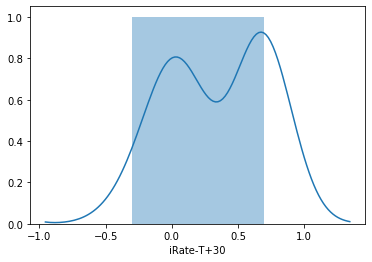

In [23]:
sns.distplot(corr.iloc[:,0])

In [24]:
pd.set_option('display.max_rows', None)
corr_data = data.tail(2000).corr()
corr_data = pd.DataFrame(corr_data['iRate-T+30'])
#corr_data = corr_data.iloc[3:,]
corr_data = corr_data.sort_values('iRate-T+30',ascending=False)
#corr_data

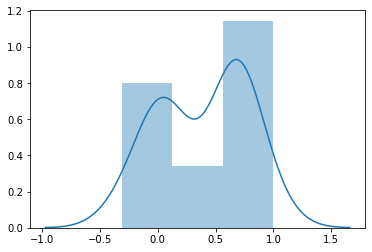

In [25]:
sns.distplot(corr_data)

In [26]:
data.dtypes

origDate            datetime64[ns]
origIntRate                float64
origUPB                      int64
origLTV                      int64
origCLTV                     int64
origDebtIncRatio             int64
WorstCreditScore             int64
zipCode                      int64
fmacRate                   float64
fredRate                   float64
rateDiff                   float64
stateCat                      int8
origRate/15SMA             float64
origRate/30SMA             float64
origRate/60SMA             float64
origRate/90SMA             float64
origRate/180SMA            float64
origRate/90EMA             float64
origRate/180EMA            float64
iRate-T+30                 float64
iRate-T+60                 float64
dtype: object

In [27]:
data['iRate-T+30'].notna()
data['iRate-T+60'].notna()

179       True
180       True
181       True
182       True
183       True
184       True
185       True
186       True
187       True
188       True
189       True
190       True
191       True
192       True
193       True
194       True
195       True
196       True
197       True
198       True
199       True
200       True
201       True
202       True
203       True
204       True
205       True
206       True
207       True
208       True
209       True
210       True
211       True
212       True
213       True
214       True
215       True
216       True
217       True
218       True
219       True
220       True
221       True
222       True
223       True
224       True
225       True
226       True
227       True
228       True
229       True
230       True
231       True
232       True
233       True
234       True
235       True
236       True
237       True
238       True
239       True
240       True
241       True
242       True
243       True
244       True
245       

In [28]:
data.head()

,origDate,origIntRate,origUPB,origLTV,origCLTV,origDebtIncRatio,WorstCreditScore,zipCode,fmacRate,fredRate,...,stateCat,origRate/15SMA,origRate/30SMA,origRate/60SMA,origRate/90SMA,origRate/180SMA,origRate/90EMA,origRate/180EMA,iRate-T+30,iRate-T+60
179,2019-02-01,4.750,416000,85,85,50,704,919,4.46,2.7,...,4,-0.015408,-0.017451,-0.008320,-0.011929,-0.017141,-0.012161,-0.013894,0.085714,0.085714
180,2019-02-01,4.375,463000,85,85,43,701,330,4.46,2.7,...,9,-0.093139,-0.089528,-0.085417,-0.087033,-0.094475,-0.088309,-0.090680,-0.078947,0.060606
181,2019-02-01,5.000,524000,85,85,45,690,920,4.46,2.7,...,4,0.032844,0.039638,0.044328,0.041881,0.034291,0.040956,0.038704,0.111111,-0.090909
182,2019-02-01,4.250,379000,85,85,20,739,80,4.46,2.7,...,32,-0.117525,-0.112463,-0.111362,-0.112346,-0.120347,-0.112903,-0.115786,-0.148297,-0.227273
183,2019-02-01,4.500,211000,85,85,38,752,720,4.46,2.7,...,2,-0.062370,-0.059437,-0.058269,-0.059039,-0.068603,-0.059444,-0.063014,-0.181818,0.058824


In [29]:
# 60 day model
data60 = data.drop(['iRate-T+30'], axis=1)
data60.head()
print(data60.shape)

(28760, 20)


### Model building using Pycaret Library

In [30]:
models=setup(data60, target = 'iRate-T+60', ignore_features = ['origDate'], silent = True, profile = False,
            remove_outliers = False)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,6618
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(28760, 20)"
4,Missing Values,True
5,Numeric Features,18
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [31]:
# 10% sample size, 5 folds, blacklist = ['ransac', 'lr', 'par', 'knn', 'huber', 'svm', 'lasso', 'llar', 'en', 'tr']
compare_models(fold = 5, blacklist = ['tr'], turbo = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,0.063,0.0066,0.0812,0.5198,0.0629,-0.0357
1,Bayesian Ridge,0.063,0.0066,0.0812,0.5197,0.0629,-0.0356
2,Linear Regression,0.0631,0.0066,0.0813,0.5193,0.0629,-0.0346
3,Random Sample Consensus,0.0629,0.0066,0.0815,0.516,0.0631,-0.0643
4,Least Angle Regression,0.0637,0.0067,0.082,0.5104,0.0632,-0.0321
5,Orthogonal Matching Pursuit,0.0638,0.0068,0.0824,0.5052,0.064,-0.0526
6,Extreme Gradient Boosting,0.0651,0.0069,0.0833,0.4945,0.0648,-0.0056
7,Random Forest,0.0653,0.007,0.0834,0.4938,0.0648,0.0258
8,Gradient Boosting Regressor,0.0652,0.007,0.0835,0.4919,0.0652,0.0061
9,AdaBoost Regressor,0.0658,0.007,0.0838,0.4878,0.0666,0.0469


In [32]:
lr = create_model('ridge', fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0639,0.0068,0.0824,0.5139,0.0640,-0.1433
1,0.0615,0.0063,0.0793,0.5046,0.0611,0.1596
2,0.0615,0.0065,0.0806,0.5047,0.0620,-0.1746
3,0.0621,0.0066,0.0810,0.4995,0.0633,-0.0804
4,0.0658,0.0069,0.0828,0.5762,0.0643,0.0604
Mean,0.0630,0.0066,0.0812,0.5198,0.0629,-0.0357
SD,0.0017,0.0002,0.0012,0.0286,0.0012,0.1267


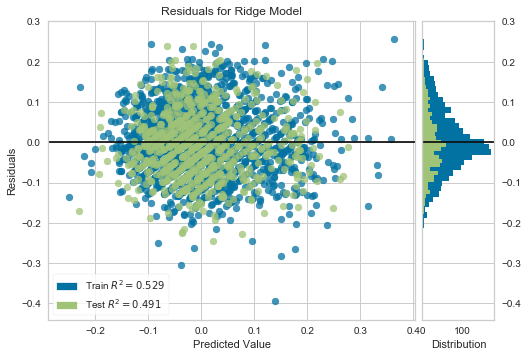

In [33]:
plot_model(lr, plot = 'residuals')

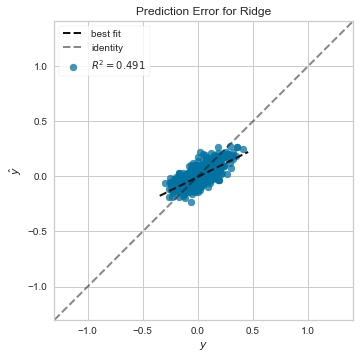

In [34]:
plot_model(lr, plot = 'error')

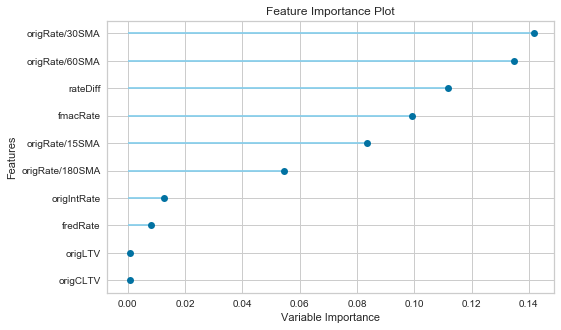

In [35]:
plot_model(lr, plot = 'feature')

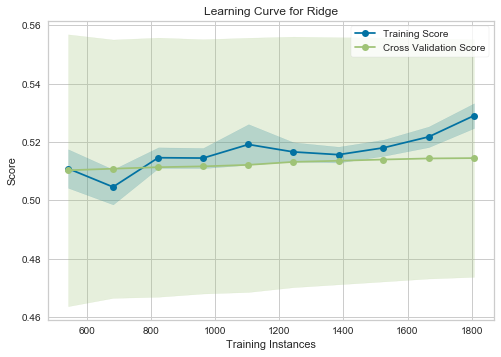

In [36]:
plot_model(lr, plot = 'learning')

In [37]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [38]:
prediction = predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge,0.0629,0.0063,0.0792,0.4907,0.0629,0.108


In [39]:
# def Chi_square(col_1,col_2):
#     X=data[col_1].astype('str')
#     Y=data[col_2].astype('str')
#     observed_values=pd.crosstab(Y,X)
#     chi2, p, dof, expected = ss.chi2_contingency(observed_values)
#     if(p>0.05):
#         print(col_1," is not required")
#     else:
#         print(col_1," is required")
        
# for col in data:
#     Chi_square(col,"rateDiffPct")